In [1695]:
import pydot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import (
    DecisionTreeClassifier
)

## Código:

### Data Understanding:

In [1696]:
class DataUnderstanding():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def frequencia_da_repetição_dos_valores(self, dataframe, coluna):
        dataframe = dataframe[coluna].value_counts().reset_index()
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe

### Data Preparetion:

In [1697]:
class DataPreparetion(DataUnderstanding):
    def removendo_nulos(self, dataframe):
        return dataframe.dropna()
    
    def removendo_colunas(self, dataframe, colunas=[]):
        return dataframe.drop(colunas, axis=1)

    def substituindo_valores(self, dataframe, colunas, valores):      
        return dataframe[colunas].replace(valores)
    
    def convertendo_para_inteiro(self, dataframe, colunas):
        return dataframe[colunas].astype(int)

    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe[colunas])
        colunas = dataframe.columns
        return dataframe, colunas
    
    def label_endcode(self, dataframe):
        training = LabelEncoder().fit(dataframe)
        dataframe = training.transform(dataframe)
        return dataframe
    
    def normalizando_os_dados(self, dataframe):
        return scale(dataframe)

### Data Visualization:

In [1698]:
class DataVisualization(DataPreparetion):
    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_linha_desempenho_do_modelo(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def gráfico_de_regressão_lmplot(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_outliers_boxplot(self, dataframe, figsize):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        fig = plt.figure(figsize=figsize)
        sns.boxplot(data=dataframe)
        plt.show()

    def gráfico_de_distribuição_histplot(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

# Regressão Logística:

## Dataframe:

### Seaborn Iris:

In [1699]:
df_iris = sns.load_dataset("iris")

In [1700]:
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Código:

In [1701]:
class RegressãoLogística(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
        

if __name__ == '__main__':
    regressão_logística = RegressãoLogística()

## Output:

### Data Understanding:

In [1702]:
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [1703]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Modelo:

In [1704]:
x = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = ['species']

In [1705]:
training, y_pred = regressão_logística.training(
    dataframe=df_iris,
    x=x,
    y=y
)

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1706]:
df_iris['predictions'] = regressão_logística.predictions(
    training=training,
    input=df_iris[x]
)

In [1707]:
display(df_iris[df_iris['species'] != df_iris['predictions']])

,sepal_length,sepal_width,petal_length,petal_width,species,predictions
70,5.9,3.2,4.8,1.8,versicolor,virginica
77,6.7,3.0,5.0,1.7,versicolor,virginica
83,6.0,2.7,5.1,1.6,versicolor,virginica


## Exercise:

## Dataframe:

### Golf:

In [1708]:
path = r'../../../../data/golf_df.xlsx'
df_golf = pd.read_excel(
    io=path
)

In [1709]:
display(df_golf.head())

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


### Código:

In [1710]:
class exercise(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
        

if __name__ == '__main__':
    exercise = exercise()

### Output:

### Data Understanding:

In [1711]:
display(df_golf.head())

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [1712]:
df_golf.columns

Index(['clima', 'temp', 'umidade', 'vento', 'jogar'], dtype='object')

In [1713]:
for coluna in df_golf.columns:
    print(f'{coluna}:')
    display(exercise.frequencia_da_repetição_dos_valores(
        dataframe=df_golf,
        coluna=coluna
    ))

clima:


,index,clima
0,sunny,5
1,rainy,5
2,overcast,4


temp:


,index,temp
0,mild,6
1,hot,4
2,cool,4


umidade:


,index,umidade
0,high,7
1,normal,7


vento:


,index,vento
0,no,8
1,yes,6


jogar:


,index,jogar
0,yes,9
1,no,5


### Data Preparetion:

In [1714]:
colunas = ['clima', 'temp', 'umidade', 'vento']

In [1715]:
for coluna in colunas:
    df_golf[coluna] = exercise.label_endcode(
        dataframe=df_golf[coluna],
    )

### Modelo:

In [1716]:
df_golf.columns

Index(['clima', 'temp', 'umidade', 'vento', 'jogar'], dtype='object')

In [1717]:
x = ['clima', 'temp', 'umidade', 'vento']
y = ['jogar']

In [1718]:
training, y_pred = exercise.training(
    dataframe=df_golf,
    x=x,
    y=y
)

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1719]:
df_golf['predictions'] = exercise.predictions(
    training=training,
    input=df_golf[x]
)

In [1720]:
display(df_golf.head())

,clima,temp,umidade,vento,jogar,predictions
0,2,1,0,0,no,yes
1,2,1,0,1,no,no
2,0,1,0,0,yes,yes
3,1,2,0,0,yes,yes
4,1,0,1,0,yes,yes


In [1721]:
display(df_golf[df_golf['jogar'] != df_golf['predictions']])

,clima,temp,umidade,vento,jogar,predictions
0,2,1,0,0,no,yes
5,1,0,1,1,no,yes
10,2,2,1,1,yes,no


# Árvore de Decisão:

## Dataframe:

### Vendas:

In [1722]:
path = r'../../../../data/vendas.xlsx'
df_sales = pd.read_excel(
    io=path
)

In [1723]:
display(df_sales.head())

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


## Código:

In [1724]:
class ÁrvoreDeDecisão(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            DecisionTreeClassifier().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore


if __name__ == '__main__':
    árvore_de_decisão = ÁrvoreDeDecisão()

## Output:

### Data Understanding:

In [1725]:
display(df_sales.head())

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


In [1726]:
x = ["media_rating", "media_pedidos", "test"]
y = ["cliente_comprou"]

### Data Preparetion:

In [1727]:
df_sales_copy = df_sales.copy()

In [1728]:
dataframe, colunas = árvore_de_decisão.dummy(
    dataframe=df_sales,
    colunas=x
)
df_sales[colunas] = dataframe[colunas]

In [1729]:
df_sales = árvore_de_decisão.removendo_colunas(
    dataframe=df_sales,
    colunas=['test']
)

In [1730]:
df_sales['cliente_comprou'] = exercise.label_endcode(
    dataframe=df_sales['cliente_comprou'],
)

In [1731]:
display(df_sales.head())

,media_rating,media_pedidos,cliente_comprou,test_No,test_Yes
0,1.5,11,1,1,0
1,2.5,11,0,1,0
2,2.5,11,0,1,0
3,1.5,13,1,1,0
4,2.5,13,0,1,0


In [1732]:
df_sales.columns

Index(['media_rating', 'media_pedidos', 'cliente_comprou', 'test_No',
       'test_Yes'],
      dtype='object')

### Modelo:

In [1733]:
x = ['media_rating', 'media_pedidos', 'test_No', 'test_Yes']
y = ["cliente_comprou"]

In [1734]:
training, y_pred = árvore_de_decisão.training(
    dataframe=df_sales,
    x=x,
    y=y
)

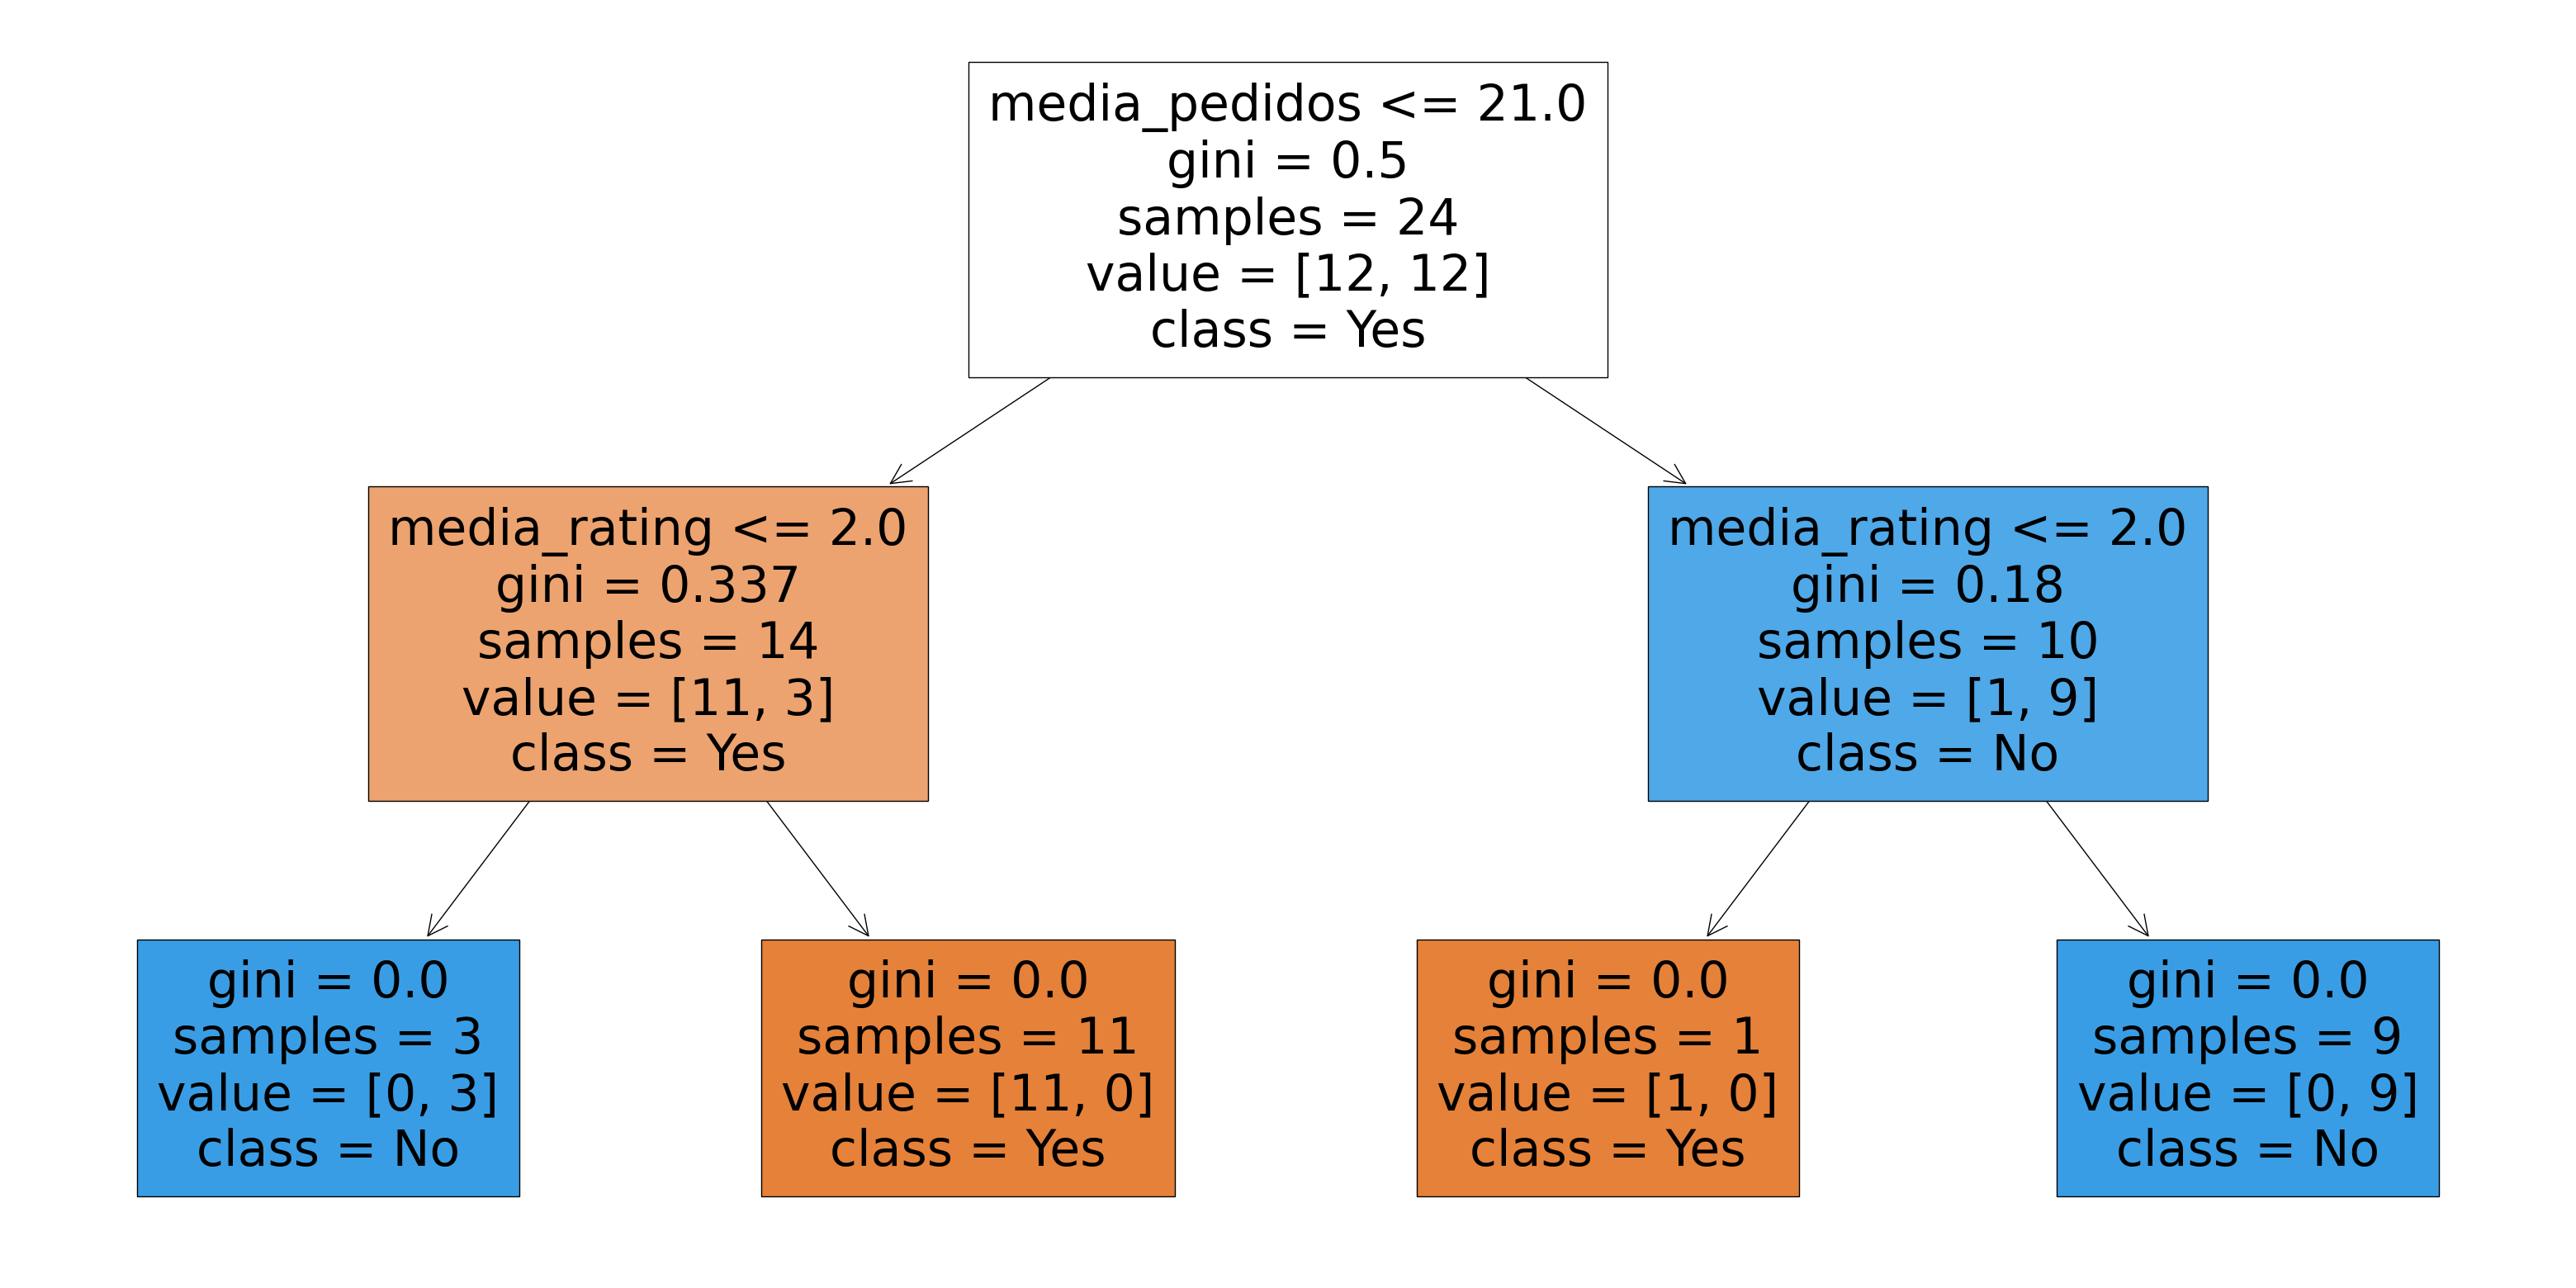

In [1735]:
árvore_de_decisão.gráfico_de_decisão(
    dataframe=df_sales,
    treinamento=training
);

# KNN:

## Dataframe:

### Vinho:

In [1736]:
df_wine = datasets.load_wine()

In [1737]:
display(df_wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## Código:

In [1738]:
class KNN(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            random_state=42
        )

        training = (
            KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore
    
    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   


if __name__ == '__main__':
    knn = KNN()

# Output:

### Data Understanding:

In [1739]:
display(df_wine.feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Data Preparetion:

### Modelo:

In [1740]:
training, y_pred, y_test = knn.training(
    x=df_wine.data,
    y=df_wine.target
);

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1741]:
knn.métrica(
    y_pred=y_pred,
    y_test=y_test
)

Accuracy: 0.7222222222222222


# SVM:

## Dataframe:

In [1742]:
df_bc = datasets.load_breast_cancer()

In [1743]:
display(df_bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Código:

In [1744]:
class SVM(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.3, 
            random_state=1, 
            stratify=y
        )

        training_std = (
            StandardScaler().fit(x_train, y_train)
        )

        x_train_std = training_std.transform(x_train)
        x_test_std = training_std.transform(x_test)

        svc = (
            SVC(C=1.0, random_state=1, kernel='linear')
            .fit(x_train_std, y_train)
        )

        training = (
            svc.fit(x_train_std, y_train)
        )

        y_pred = svc.predict(x_test_std)

        return training, y_pred, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore
    
    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

    def gráfico_de_dispersão(self, x, y):
        gráfico = plt.scatter(x[:, 0], x[:, 1], c=y)
        return gráfico


if __name__ == '__main__':
    svm = SVM()

## Output:

### Data Understanding:

### Data Preparetion:

### Data Visualization:

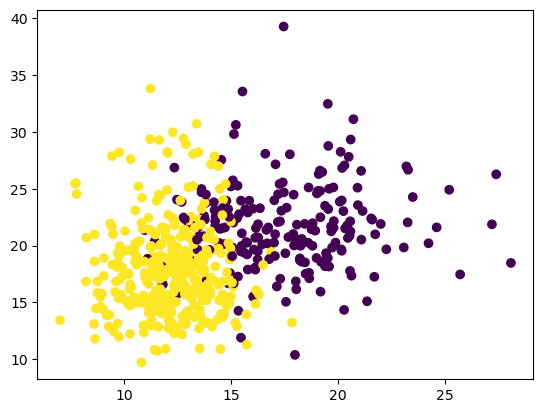

In [1745]:
svm.gráfico_de_dispersão(
    x=df_bc.data,
    y=df_bc.target,
)

### Modelo:

In [1746]:
training, y_pred, y_test = svm.training(
    x = df_bc.data,
    y = df_bc.target
)

In [1747]:
svm.métrica(
    y_pred=y_pred, 
    y_test=y_test
)

Accuracy score 0.953
